# Model training and evaluation (static + dynamic data)

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
df_results = pd.DataFrame()

In [3]:
# metrics for each class + weighted average (- bad impact)
# micro f1 = accuracy
def print_metrics(cls):
    global df_results
    
    predicted = cls.predict(X_test)
    sns.heatmap(metrics.confusion_matrix(y_test, predicted), annot=True, fmt='g', annot_kws={"size": 16})
    print('accuracy: ',metrics.accuracy_score(y_test, predicted))
    print()
    print(metrics.classification_report(y_test, predicted))
    print('macro precision: ',metrics.precision_score(y_test, predicted, average='macro'))
    print('micro precision: ',metrics.precision_score(y_test, predicted, average='micro'))
    print()
    print('micro recall: ',metrics.recall_score(y_test, predicted, average='micro'))
    print('macro recall: ',metrics.recall_score(y_test, predicted, average='macro'))
    print()
    print('micro f1: ',metrics.f1_score(y_test, predicted, average='micro'))
    print('macro f1: ',metrics.f1_score(y_test, predicted, average='macro'))
    
    df_result = pd.DataFrame({
        'Algoritmus': [str(cls).split('(')[0]],
        
        'Transformácia': ['áno' if transformed else 'nie'],
        
        'S': [round(metrics.accuracy_score(y_test, predicted), 2)],
        
        'P_0': [round(precision_score(y_test, cls.predict(X_test), average=None)[0], 2)],
        'P_1': [round(precision_score(y_test, cls.predict(X_test), average=None)[1], 2)],
        'P_2': [round(precision_score(y_test, cls.predict(X_test), average=None)[2], 2)],
        'P_3': [round(precision_score(y_test, cls.predict(X_test), average=None)[3], 2)],
        
        'Ú_0': [round(recall_score(y_test, cls.predict(X_test), average=None)[0], 2)],
        'Ú_1': [round(recall_score(y_test, cls.predict(X_test), average=None)[1], 2)],
        'Ú_2': [round(recall_score(y_test, cls.predict(X_test), average=None)[2], 2)],
        'Ú_3': [round(recall_score(y_test, cls.predict(X_test), average=None)[3], 2)],
        
        'F1_makro': [round(metrics.f1_score(y_test, predicted, average='macro'), 2)],
    })
        
    df_results = df_results.append(df_result, ignore_index=True)
    
    plt.show()

In [4]:
def train_eval(classifier, rand_state = False, **kwargs):
    if rand_state:
        cls = classifier(random_state=16, **kwargs)
    else:
        cls = classifier(**kwargs)
    cls.fit(X_train, y_train)
    print_metrics(cls)

In [5]:
# prepare categorical features (one hot encoded)
categorical_train = pd.read_csv('data/split/transformed/train_categories.csv', index_col=0)
categorical_test = pd.read_csv('data/split/transformed/test_categories.csv', index_col=0)

In [6]:
categorical_train.shape

(18296, 60)

In [7]:
categorical_test.shape

(6099, 60)

## Original data (no scaling, no normalization)

In [8]:
# prepare original data 
X_train = pd.read_csv('data/split/transformed/train_original.csv', index_col=0)
X_test = pd.read_csv('data/split/transformed/test_original.csv', index_col=0)

# merge with categorical
X_train = pd.concat([X_train, categorical_train], axis=1)
X_test = pd.concat([X_test, categorical_test], axis=1)

X_train = X_train[(X_train['ratio_running_duration'] >= 0) & (X_train['ratio_running_duration'] < 25)]
X_test = X_test[(X_test['ratio_running_duration'] >= 0) & (X_test['ratio_running_duration'] < 25)]

y_train = X_train['class']
y_test = X_test['class']

X_train.drop('class', axis=1, inplace=True)
X_test.drop('class', axis=1, inplace=True)

In [9]:
X_train.shape

(4713, 101)

In [10]:
X_test.shape

(1571, 101)

In [11]:
X_train.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4713 entries, 0 to 4712
Data columns (total 101 columns):
average_pledge                           4713 non-null float64
backers_count                            4713 non-null int64
category_position                        4713 non-null int64
days_duration                            4713 non-null int64
days_preparation                         4713 non-null int64
days_remaining                           4713 non-null int64
days_running                             4713 non-null int64
db_duration                              4713 non-null int64
goal                                     4713 non-null float64
pledged                                  4713 non-null float64
ratio_pledged_goal                       4713 non-null float64
ratio_running_duration                   4713 non-null float64
staff_pick                               4713 non-null int64
usd_goal                                 4713 non-null int64
usd_pledged                 

In [12]:
transformed = False

## Classifiers

accuracy:  0.544875875239

             precision    recall  f1-score   support

          1       0.83      0.65      0.73       655
          2       0.25      0.31      0.28       202
          3       0.41      0.49      0.45       379
          4       0.52      0.54      0.53       335

avg / total       0.59      0.54      0.56      1571

macro precision:  0.502036481464
micro precision:  0.544875875239

micro recall:  0.544875875239
macro recall:  0.498609587836

micro f1:  0.544875875239
macro f1:  0.495538088651


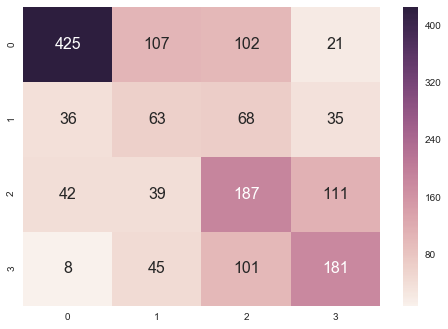

In [13]:
from sklearn.naive_bayes import BernoulliNB
train_eval(BernoulliNB)

accuracy:  0.64099299809

             precision    recall  f1-score   support

          1       0.85      0.86      0.85       655
          2       0.28      0.33      0.30       202
          3       0.48      0.45      0.46       379
          4       0.65      0.63      0.64       335

avg / total       0.64      0.64      0.64      1571

macro precision:  0.565348921911
micro precision:  0.64099299809

micro recall:  0.64099299809
macro recall:  0.564745564848

micro f1:  0.64099299809
macro f1:  0.564439618273


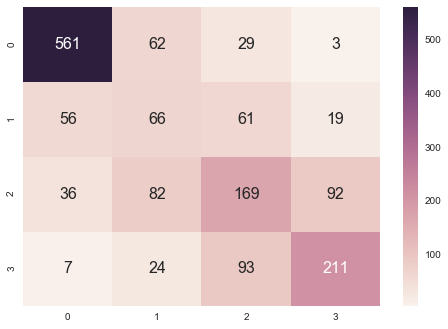

In [14]:
from sklearn.tree import DecisionTreeClassifier
train_eval(DecisionTreeClassifier, True)

accuracy:  0.539147040102

             precision    recall  f1-score   support

          1       0.74      0.77      0.75       655
          2       0.22      0.23      0.23       202
          3       0.40      0.37      0.38       379
          4       0.48      0.47      0.47       335

avg / total       0.54      0.54      0.54      1571

macro precision:  0.459602256246
micro precision:  0.539147040102

micro recall:  0.539147040102
macro recall:  0.459665513721

micro f1:  0.539147040102
macro f1:  0.459420876451


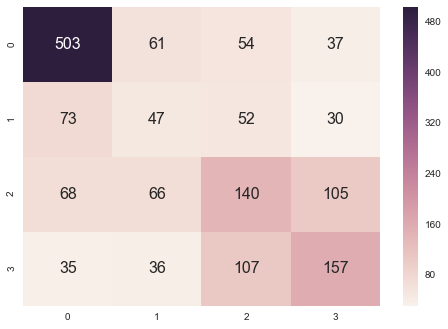

In [15]:
from sklearn.tree import ExtraTreeClassifier
train_eval(ExtraTreeClassifier, True)

accuracy:  0.651177593889

             precision    recall  f1-score   support

          1       0.76      0.94      0.84       655
          2       0.28      0.18      0.22       202
          3       0.53      0.50      0.51       379
          4       0.67      0.56      0.61       335

avg / total       0.62      0.65      0.63      1571

macro precision:  0.558617694034
micro precision:  0.651177593889

micro recall:  0.651177593889
macro recall:  0.541340445333

micro f1:  0.651177593889
macro f1:  0.543488653853


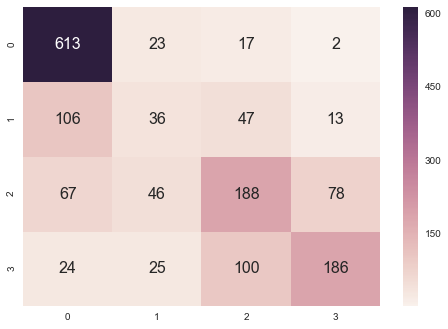

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
train_eval(ExtraTreesClassifier, True)

accuracy:  0.332908975175

             precision    recall  f1-score   support

          1       0.99      0.12      0.22       655
          2       0.14      0.15      0.14       202
          3       0.29      0.90      0.44       379
          4       0.85      0.21      0.34       335

avg / total       0.68      0.33      0.29      1571

macro precision:  0.564895238085
micro precision:  0.332908975175

micro recall:  0.332908975175
macro recall:  0.346241806189

micro f1:  0.332908975175
macro f1:  0.283961783554


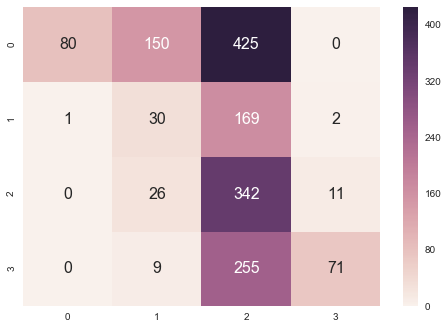

In [17]:
from sklearn.naive_bayes import GaussianNB
train_eval(GaussianNB)

accuracy:  0.661362189688

             precision    recall  f1-score   support

          1       0.79      0.95      0.86       655
          2       0.27      0.21      0.24       202
          3       0.52      0.46      0.48       379
          4       0.70      0.60      0.65       335

avg / total       0.64      0.66      0.64      1571

macro precision:  0.568835286962
micro precision:  0.661362189688

micro recall:  0.661362189688
macro recall:  0.555103086189

micro f1:  0.661362189688
macro f1:  0.557774905863


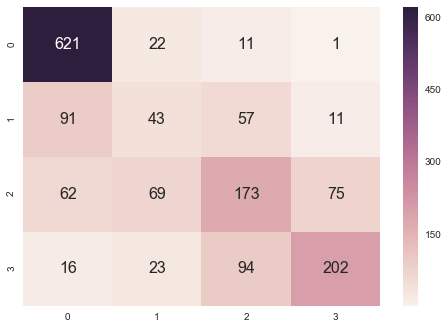

In [18]:
from sklearn.neighbors import KNeighborsClassifier
train_eval(KNeighborsClassifier)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


accuracy:  0.602164226607

             precision    recall  f1-score   support

          1       0.63      0.89      0.73       655
          2       0.28      0.08      0.12       202
          3       0.49      0.44      0.47       379
          4       0.74      0.54      0.62       335

avg / total       0.57      0.60      0.57      1571

macro precision:  0.533894891739
micro precision:  0.602164226607

micro recall:  0.602164226607
macro recall:  0.487172322989

micro f1:  0.602164226607
macro f1:  0.48666133755


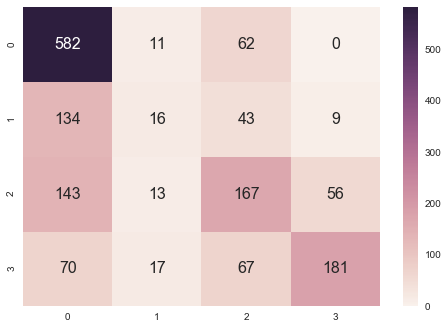

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
train_eval(LinearDiscriminantAnalysis)

In [20]:
#from sklearn.svm import LinearSVC
#train_eval(LinearSVC, True, multi_class='crammer_singer')

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


accuracy:  0.746658179504

             precision    recall  f1-score   support

          1       0.84      0.97      0.90       655
          2       0.50      0.31      0.38       202
          3       0.62      0.65      0.63       379
          4       0.79      0.69      0.73       335

avg / total       0.73      0.75      0.73      1571

macro precision:  0.68729016019
micro precision:  0.746658179504

micro recall:  0.746658179504
macro recall:  0.653010005813

micro f1:  0.746658179504
macro f1:  0.661932155147


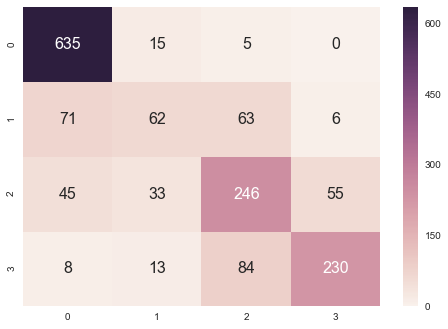

In [21]:
from sklearn.linear_model import LogisticRegression
train_eval(LogisticRegression, True, multi_class='multinomial', solver='newton-cg')

accuracy:  0.692552514322

             precision    recall  f1-score   support

          1       0.74      0.98      0.84       655
          2       0.52      0.11      0.19       202
          3       0.55      0.56      0.56       379
          4       0.77      0.63      0.69       335

avg / total       0.67      0.69      0.66      1571

macro precision:  0.645726214118
micro precision:  0.692552514322

micro recall:  0.692552514322
macro recall:  0.570807889695

micro f1:  0.692552514322
macro f1:  0.569480997789


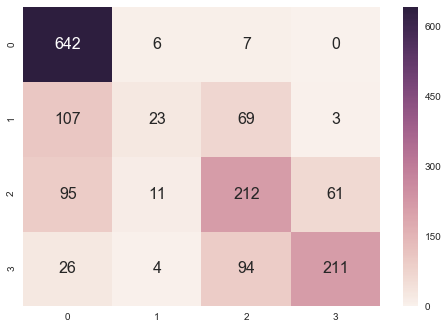

In [22]:
from sklearn.linear_model import LogisticRegressionCV
train_eval(LogisticRegressionCV, True, multi_class='multinomial')

accuracy:  0.658816040738

             precision    recall  f1-score   support

          1       0.87      0.88      0.88       655
          2       0.33      0.46      0.38       202
          3       0.49      0.60      0.54       379
          4       0.83      0.41      0.55       335

avg / total       0.70      0.66      0.66      1571

macro precision:  0.630928250199
micro precision:  0.658816040738

micro recall:  0.658816040738
macro recall:  0.587557884813

micro f1:  0.658816040738
macro f1:  0.587930954653


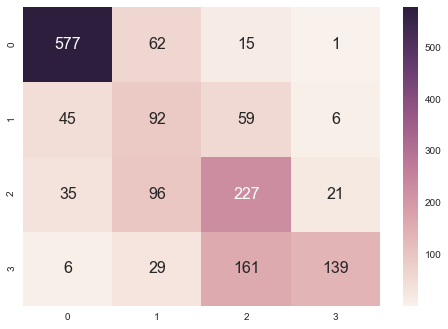

In [23]:
from sklearn.neural_network import MLPClassifier
train_eval(MLPClassifier, True)

accuracy:  0.319541693189

             precision    recall  f1-score   support

          1       0.87      0.13      0.22       655
          2       0.14      0.24      0.17       202
          3       0.29      0.81      0.43       379
          4       0.89      0.19      0.31       335

avg / total       0.64      0.32      0.28      1571

macro precision:  0.547724792401
micro precision:  0.319541693189

micro recall:  0.319541693189
macro recall:  0.341844475349

micro f1:  0.319541693189
macro f1:  0.2843087901


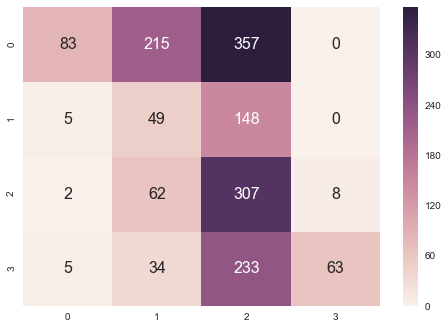

In [24]:
from sklearn.neighbors import NearestCentroid
train_eval(NearestCentroid)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy:  0.239338001273

             precision    recall  f1-score   support

          1       0.91      0.04      0.08       655
          2       0.15      0.94      0.25       202
          3       0.24      0.02      0.04       379
          4       0.76      0.44      0.56       335

avg / total       0.62      0.24      0.20      1571

macro precision:  0.513479122999
micro precision:  0.239338001273

micro recall:  0.239338001273
macro recall:  0.362688291847

micro f1:  0.239338001273
macro f1:  0.23394700306


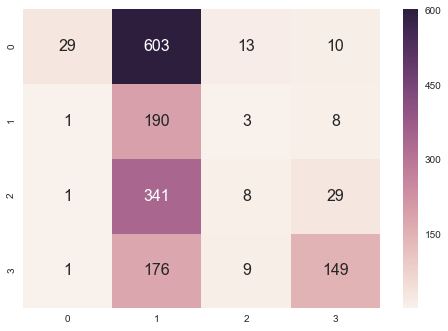

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
train_eval(QuadraticDiscriminantAnalysis)

In [26]:
#from sklearn.neighbors import RadiusNeighborsClassifier
#train_eval(RadiusNeighborsClassifier)

accuracy:  0.689369828135

             precision    recall  f1-score   support

          1       0.84      0.96      0.89       655
          2       0.37      0.26      0.30       202
          3       0.52      0.51      0.52       379
          4       0.68      0.63      0.65       335

avg / total       0.67      0.69      0.68      1571

macro precision:  0.601558987949
micro precision:  0.689369828135

micro recall:  0.689369828135
macro recall:  0.588718757652

micro f1:  0.689369828135
macro f1:  0.59150393243


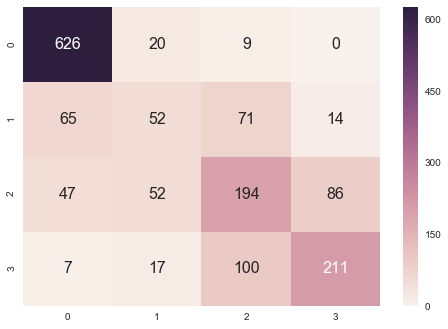

In [27]:
from sklearn.ensemble import RandomForestClassifier
train_eval(RandomForestClassifier, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.233680000929192e-17 / 1.1102230246251565e-16
  RuntimeWarning)


accuracy:  0.590070019096

             precision    recall  f1-score   support

          1       0.59      0.92      0.72       655
          2       0.50      0.02      0.05       202
          3       0.48      0.31      0.38       379
          4       0.68      0.59      0.63       335

avg / total       0.57      0.59      0.53      1571

macro precision:  0.563916754767
micro precision:  0.590070019096

micro recall:  0.590070019096
macro recall:  0.46372597486

micro f1:  0.590070019096
macro f1:  0.445660799936


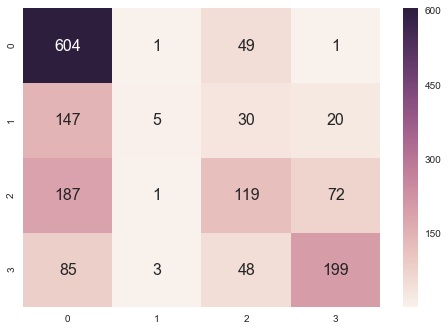

In [28]:
from sklearn.linear_model import RidgeClassifier
train_eval(RidgeClassifier, True)

accuracy:  0.590070019096

             precision    recall  f1-score   support

          1       0.59      0.93      0.72       655
          2       0.43      0.01      0.03       202
          3       0.48      0.30      0.37       379
          4       0.68      0.61      0.64       335

avg / total       0.56      0.59      0.53      1571

macro precision:  0.54447184333
micro precision:  0.590070019096

micro recall:  0.590070019096
macro recall:  0.462360638313

micro f1:  0.590070019096
macro f1:  0.440520574479


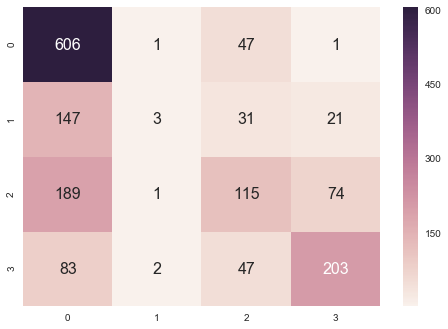

In [29]:
from sklearn.linear_model import RidgeClassifierCV
train_eval(RidgeClassifierCV)

### 1v1

accuracy:  0.416931890516

             precision    recall  f1-score   support

          1       0.42      1.00      0.59       655
          2       0.00      0.00      0.00       202
          3       0.00      0.00      0.00       379
          4       0.00      0.00      0.00       335

avg / total       0.17      0.42      0.25      1571

macro precision:  0.104299363057
micro precision:  0.416931890516

micro recall:  0.416931890516
macro recall:  0.25

micro f1:  0.416931890516
macro f1:  0.147191011236


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

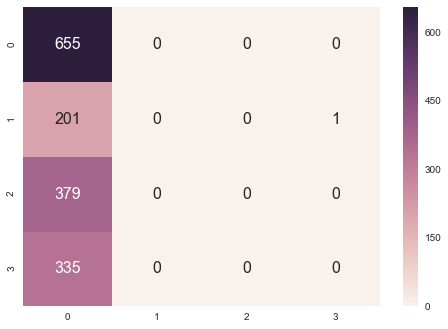

In [30]:
from sklearn.svm import NuSVC
train_eval(NuSVC, True, nu=0.1)

accuracy:  0.416931890516

             precision    recall  f1-score   support

          1       0.42      1.00      0.59       655
          2       0.00      0.00      0.00       202
          3       0.00      0.00      0.00       379
          4       0.00      0.00      0.00       335

avg / total       0.17      0.42      0.25      1571

macro precision:  0.104299363057
micro precision:  0.416931890516

micro recall:  0.416931890516
macro recall:  0.25

micro f1:  0.416931890516
macro f1:  0.147191011236


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

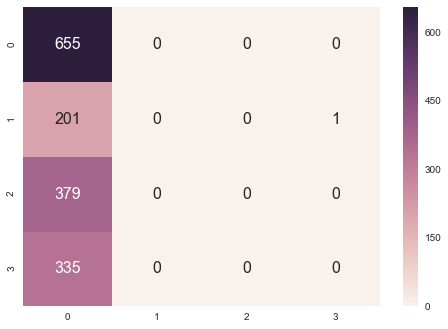

In [31]:
from sklearn.svm import SVC
train_eval(SVC, True)

accuracy:  0.416931890516

             precision    recall  f1-score   support

          1       0.43      0.96      0.59       655
          2       0.10      0.02      0.03       202
          3       0.32      0.02      0.04       379
          4       0.46      0.04      0.07       335

avg / total       0.37      0.42      0.27      1571

macro precision:  0.325926209559
micro precision:  0.416931890516

micro recall:  0.416931890516
macro recall:  0.260022458441

micro f1:  0.416931890516
macro f1:  0.182631946547


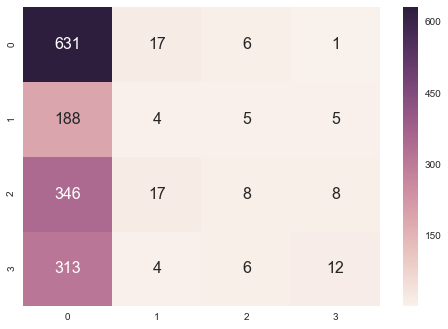

In [32]:
from sklearn.gaussian_process import GaussianProcessClassifier
train_eval(GaussianProcessClassifier, True, multi_class='one_vs_one')

### 1vAll

accuracy:  0.744748567791

             precision    recall  f1-score   support

          1       0.85      0.97      0.91       655
          2       0.49      0.38      0.43       202
          3       0.63      0.60      0.62       379
          4       0.75      0.69      0.72       335

avg / total       0.73      0.74      0.73      1571

macro precision:  0.680187031258
micro precision:  0.744748567791

micro recall:  0.744748567791
macro recall:  0.658845066953

micro f1:  0.744748567791
macro f1:  0.666235286976


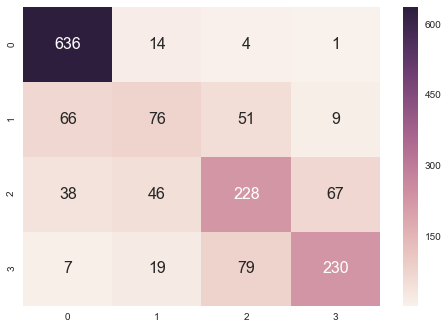

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
train_eval(GradientBoostingClassifier, True)

In [34]:
#from sklearn.gaussian_process import GaussianProcessClassifier
#train_eval(GaussianProcessClassifier, True)

accuracy:  0.583068109484

             precision    recall  f1-score   support

          1       0.83      0.90      0.86       655
          2       0.37      0.03      0.06       202
          3       0.08      0.01      0.02       379
          4       0.40      0.95      0.56       335

avg / total       0.50      0.58      0.49      1571

macro precision:  0.418367772536
micro precision:  0.583068109484

micro recall:  0.583068109484
macro recall:  0.472296533859

micro f1:  0.583068109484
macro f1:  0.376686774643


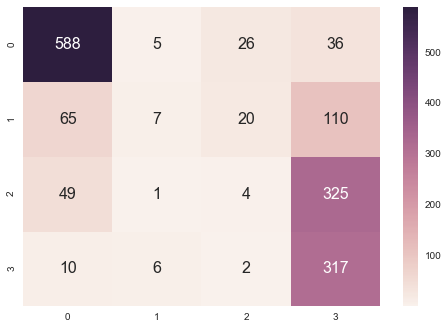

In [35]:
from sklearn.svm import LinearSVC
train_eval(LinearSVC, True, multi_class='ovr')

In [36]:
#from sklearn.linear_model import LogisticRegression
#train_eval(LogisticRegression, True, multi_class='ovr')

In [37]:
#from sklearn.linear_model import LogisticRegressionCV
#train_eval(LogisticRegressionCV, True, multi_class='ovr')

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.524506683641

             precision    recall  f1-score   support

          1       0.94      0.48      0.63       655
          2       0.00      0.00      0.00       202
          3       0.31      0.73      0.43       379
          4       0.69      0.70      0.70       335

avg / total       0.61      0.52      0.52      1571

macro precision:  0.48485176109
micro precision:  0.524506683641

micro recall:  0.524506683641
macro recall:  0.476983468727

micro f1:  0.524506683641
macro f1:  0.440618292733


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

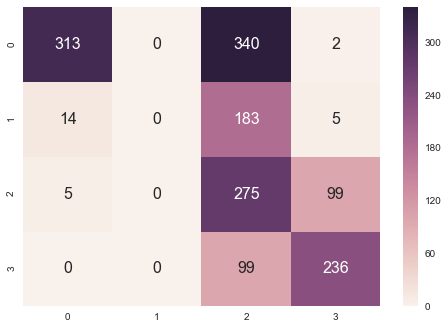

In [38]:
from sklearn.linear_model import SGDClassifier
train_eval(SGDClassifier, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.524506683641

             precision    recall  f1-score   support

          1       0.94      0.48      0.63       655
          2       0.00      0.00      0.00       202
          3       0.31      0.73      0.43       379
          4       0.69      0.70      0.70       335

avg / total       0.61      0.52      0.52      1571

macro precision:  0.48485176109
micro precision:  0.524506683641

micro recall:  0.524506683641
macro recall:  0.476983468727

micro f1:  0.524506683641
macro f1:  0.440618292733


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

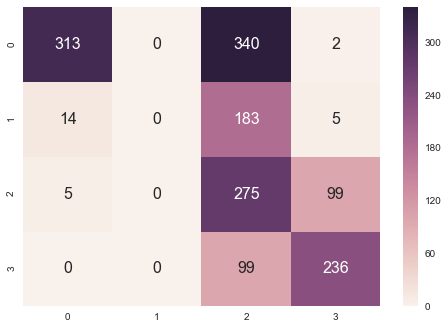

In [39]:
from sklearn.linear_model import Perceptron
train_eval(Perceptron, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.628262253342

             precision    recall  f1-score   support

          1       0.84      0.94      0.88       655
          2       0.00      0.00      0.00       202
          3       0.44      0.25      0.32       379
          4       0.45      0.83      0.58       335

avg / total       0.55      0.63      0.57      1571

macro precision:  0.431043738787
micro precision:  0.628262253342

micro recall:  0.628262253342
macro recall:  0.504756690475

micro f1:  0.628262253342
macro f1:  0.446797830274


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

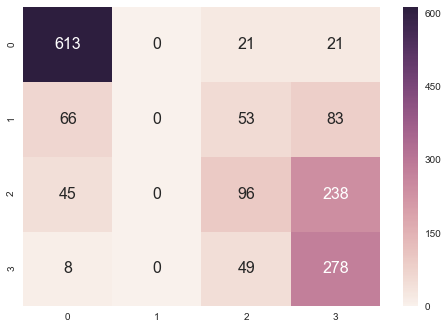

In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier
train_eval(PassiveAggressiveClassifier, True)

### Results

In [41]:
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']].sort_values(by=['Algoritmus', 'Transformácia'])

,Algoritmus,Transformácia,S,P_0,P_1,P_2,P_3,Ú_0,Ú_1,Ú_2,Ú_3,F1_makro
0,BernoulliNB,nie,0.54,0.83,0.25,0.41,0.52,0.65,0.31,0.49,0.54,0.50
1,DecisionTreeClassifier,nie,0.64,0.85,0.28,0.48,0.65,0.86,0.33,0.45,0.63,0.56
2,ExtraTreeClassifier,nie,0.54,0.74,0.22,0.40,0.48,0.77,0.23,0.37,0.47,0.46
3,ExtraTreesClassifier,nie,0.65,0.76,0.28,0.53,0.67,0.94,0.18,0.50,0.56,0.54
4,GaussianNB,nie,0.33,0.99,0.14,0.29,0.85,0.12,0.15,0.90,0.21,0.28
17,GaussianProcessClassifier,nie,0.42,0.43,0.10,0.32,0.46,0.96,0.02,0.02,0.04,0.18
18,GradientBoostingClassifier,nie,0.74,0.85,0.49,0.63,0.75,0.97,0.38,0.60,0.69,0.67
5,KNeighborsClassifier,nie,0.66,0.79,0.27,0.52,0.70,0.95,0.21,0.46,0.60,0.56
6,LinearDiscriminantAnalysis,nie,0.60,0.63,0.28,0.49,0.74,0.89,0.08,0.44,0.54,0.49
19,LinearSVC,nie,0.58,0.83,0.37,0.08,0.40,0.90,0.03,0.01,0.95,0.38


## Transformed data (RobustScaler + Box-cox)

In [42]:
# prepare transformed data 
X_train = pd.read_csv('data/split/transformed/train.csv', index_col=0)
X_test = pd.read_csv('data/split/transformed/test.csv', index_col=0)

# merge with categorical
X_train = pd.concat([X_train, categorical_train], axis=1)
X_test = pd.concat([X_test, categorical_test], axis=1)

X_train = X_train[(X_train['ratio_running_duration_original'] >= 0) & (X_train['ratio_running_duration_original'] < 25)]
X_test = X_test[(X_test['ratio_running_duration_original'] >= 0) & (X_test['ratio_running_duration_original'] < 25)]

y_train = X_train['class']
y_test = X_test['class']

X_train.drop(['class', 'ratio_running_duration_original'], axis=1, inplace=True)
X_test.drop(['class', 'ratio_running_duration_original'], axis=1, inplace=True)

In [43]:
X_train.shape

(4713, 101)

In [44]:
X_test.shape

(1571, 101)

In [45]:
X_train.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4713 entries, 0 to 4712
Data columns (total 101 columns):
average_pledge                           4713 non-null float64
backers_count                            4713 non-null float64
category_position                        4713 non-null float64
days_duration                            4713 non-null float64
days_preparation                         4713 non-null float64
days_remaining                           4713 non-null float64
days_running                             4713 non-null float64
db_duration                              4713 non-null float64
goal                                     4713 non-null float64
pledged                                  4713 non-null float64
ratio_pledged_goal                       4713 non-null float64
ratio_running_duration                   4713 non-null float64
staff_pick                               4713 non-null float64
usd_goal                                 4713 non-null float64
usd_pledge

In [46]:
transformed = True

## Classifiers

accuracy:  0.546148949714

             precision    recall  f1-score   support

          1       0.83      0.65      0.73       655
          2       0.24      0.30      0.27       202
          3       0.41      0.51      0.46       379
          4       0.53      0.54      0.53       335

avg / total       0.59      0.55      0.56      1571

macro precision:  0.502276118681
micro precision:  0.546148949714

micro recall:  0.546148949714
macro recall:  0.498108231534

micro f1:  0.546148949714
macro f1:  0.495472559896


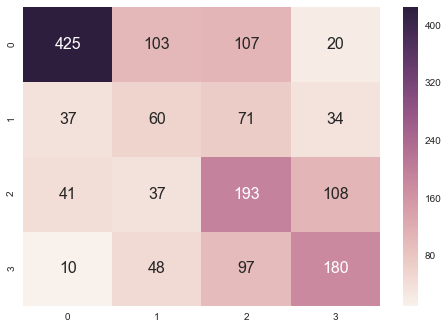

In [47]:
from sklearn.naive_bayes import BernoulliNB
train_eval(BernoulliNB)

accuracy:  0.64099299809

             precision    recall  f1-score   support

          1       0.86      0.84      0.85       655
          2       0.28      0.33      0.30       202
          3       0.50      0.46      0.48       379
          4       0.63      0.63      0.63       335

avg / total       0.65      0.64      0.64      1571

macro precision:  0.567151513097
micro precision:  0.64099299809

micro recall:  0.64099299809
macro recall:  0.567547167744

micro f1:  0.64099299809
macro f1:  0.566637025931


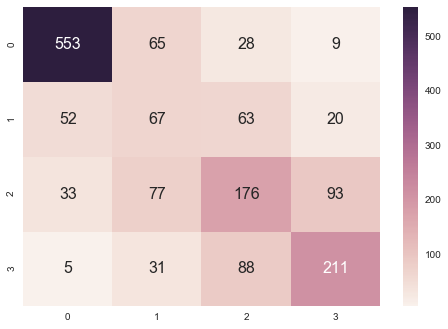

In [48]:
from sklearn.tree import DecisionTreeClassifier
train_eval(DecisionTreeClassifier, True)

accuracy:  0.605346912794

             precision    recall  f1-score   support

          1       0.81      0.84      0.82       655
          2       0.30      0.31      0.31       202
          3       0.45      0.43      0.44       379
          4       0.54      0.53      0.53       335

avg / total       0.60      0.61      0.60      1571

macro precision:  0.525954024149
micro precision:  0.605346912794

micro recall:  0.605346912794
macro recall:  0.525970637207

micro f1:  0.605346912794
macro f1:  0.525831804092


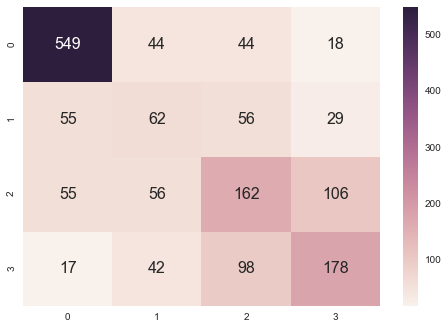

In [49]:
from sklearn.tree import ExtraTreeClassifier
train_eval(ExtraTreeClassifier, True)

accuracy:  0.683004455761

             precision    recall  f1-score   support

          1       0.82      0.96      0.89       655
          2       0.35      0.22      0.27       202
          3       0.53      0.52      0.53       379
          4       0.65      0.61      0.63       335

avg / total       0.66      0.68      0.67      1571

macro precision:  0.590111929755
micro precision:  0.683004455761

micro recall:  0.683004455761
macro recall:  0.57706531609

micro f1:  0.683004455761
macro f1:  0.578151306103


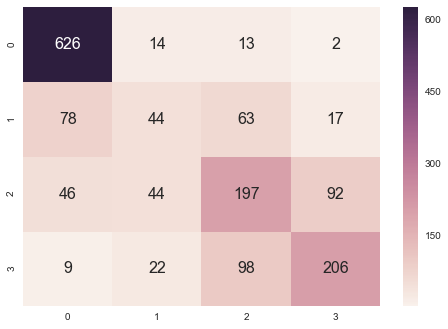

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
train_eval(ExtraTreesClassifier, True)

accuracy:  0.257797581158

             precision    recall  f1-score   support

          1       0.86      0.11      0.19       655
          2       0.15      0.92      0.25       202
          3       0.46      0.05      0.09       379
          4       0.68      0.39      0.50       335

avg / total       0.63      0.26      0.24      1571

macro precision:  0.536606907596
micro precision:  0.257797581158

micro recall:  0.257797581158
macro recall:  0.365694177634

micro f1:  0.257797581158
macro f1:  0.257322095315


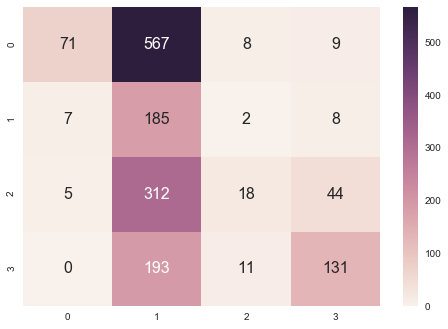

In [51]:
from sklearn.naive_bayes import GaussianNB
train_eval(GaussianNB)

accuracy:  0.499681731381

             precision    recall  f1-score   support

          1       0.57      0.83      0.68       655
          2       0.15      0.10      0.12       202
          3       0.38      0.28      0.32       379
          4       0.56      0.34      0.42       335

avg / total       0.47      0.50      0.47      1571

macro precision:  0.414901299735
micro precision:  0.499681731381

micro recall:  0.499681731381
macro recall:  0.388254568722

micro f1:  0.499681731381
macro f1:  0.386076245115


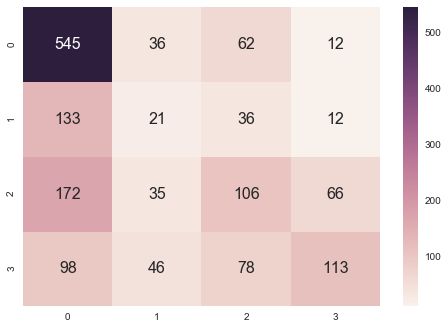

In [52]:
from sklearn.neighbors import KNeighborsClassifier
train_eval(KNeighborsClassifier)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


accuracy:  0.720560152769

             precision    recall  f1-score   support

          1       0.86      0.91      0.88       655
          2       0.40      0.46      0.43       202
          3       0.67      0.50      0.57       379
          4       0.71      0.76      0.73       335

avg / total       0.72      0.72      0.72      1571

macro precision:  0.657893927922
micro precision:  0.720560152769

micro recall:  0.720560152769
macro recall:  0.656715711384

micro f1:  0.720560152769
macro f1:  0.65345105943


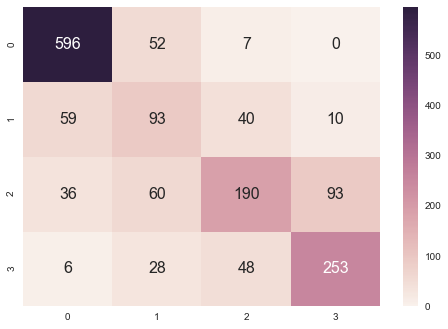

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
train_eval(LinearDiscriminantAnalysis)

In [54]:
#from sklearn.svm import LinearSVC
#train_eval(LinearSVC, True, multi_class='crammer_singer')

accuracy:  0.733927434755

             precision    recall  f1-score   support

          1       0.84      0.95      0.89       655
          2       0.50      0.30      0.38       202
          3       0.61      0.57      0.59       379
          4       0.71      0.76      0.74       335

avg / total       0.71      0.73      0.72      1571

macro precision:  0.666668529057
micro precision:  0.733927434755

micro recall:  0.733927434755
macro recall:  0.645383306863

micro f1:  0.733927434755
macro f1:  0.648454458916


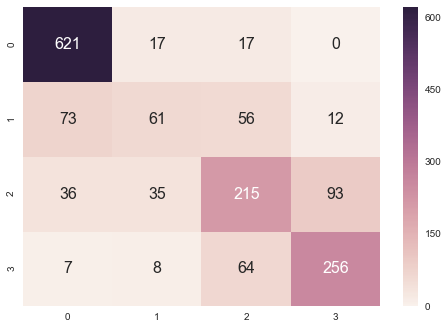

In [55]:
from sklearn.linear_model import LogisticRegression
train_eval(LogisticRegression, True, multi_class='multinomial', solver='newton-cg')

accuracy:  0.73774665818

             precision    recall  f1-score   support

          1       0.86      0.94      0.90       655
          2       0.48      0.35      0.40       202
          3       0.61      0.58      0.60       379
          4       0.72      0.75      0.74       335

avg / total       0.72      0.74      0.73      1571

macro precision:  0.668532893219
micro precision:  0.73774665818

micro recall:  0.73774665818
macro recall:  0.656164225947

micro f1:  0.73774665818
macro f1:  0.659383356466


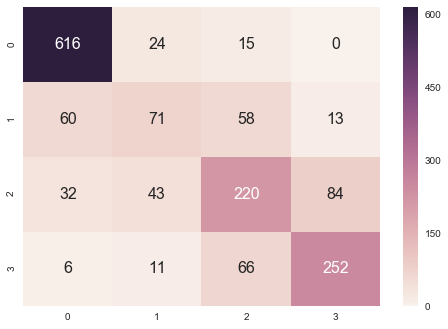

In [56]:
from sklearn.linear_model import LogisticRegressionCV
train_eval(LogisticRegressionCV, True, multi_class='multinomial')

accuracy:  0.726288987906

             precision    recall  f1-score   support

          1       0.87      0.92      0.89       655
          2       0.48      0.34      0.40       202
          3       0.59      0.57      0.58       379
          4       0.69      0.76      0.72       335

avg / total       0.71      0.73      0.72      1571

macro precision:  0.656657192042
micro precision:  0.726288987906

micro recall:  0.726288987906
macro recall:  0.646556941373

micro f1:  0.726288987906
macro f1:  0.64822430966


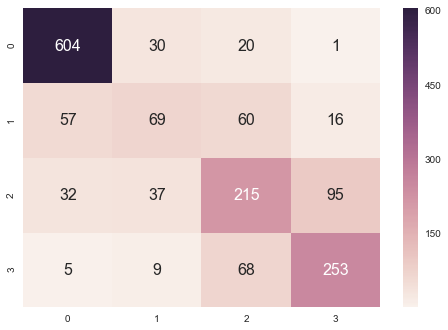

In [57]:
from sklearn.neural_network import MLPClassifier
train_eval(MLPClassifier, True)

accuracy:  0.399745385105

             precision    recall  f1-score   support

          1       0.78      0.45      0.57       655
          2       0.15      0.46      0.23       202
          3       0.36      0.43      0.39       379
          4       0.66      0.23      0.34       335

avg / total       0.57      0.40      0.43      1571

macro precision:  0.484503789554
micro precision:  0.399745385105

micro recall:  0.399745385105
macro recall:  0.392763543284

micro f1:  0.399745385105
macro f1:  0.382267114789


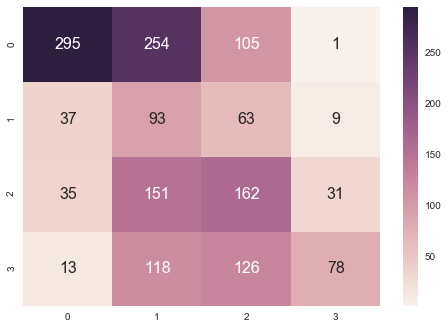

In [58]:
from sklearn.neighbors import NearestCentroid
train_eval(NearestCentroid)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy:  0.173138128581

             precision    recall  f1-score   support

          1       0.86      0.03      0.06       655
          2       0.13      0.92      0.23       202
          3       0.36      0.01      0.02       379
          4       0.44      0.19      0.27       335

avg / total       0.56      0.17      0.12      1571

macro precision:  0.451107198238
micro precision:  0.173138128581

micro recall:  0.173138128581
macro recall:  0.286612020894

micro f1:  0.173138128581
macro f1:  0.143923940431


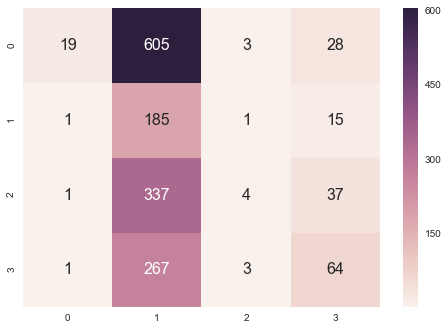

In [59]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
train_eval(QuadraticDiscriminantAnalysis)

In [60]:
#from sklearn.neighbors import RadiusNeighborsClassifier
#train_eval(RadiusNeighborsClassifier)

accuracy:  0.704010184596

             precision    recall  f1-score   support

          1       0.84      0.95      0.89       655
          2       0.40      0.29      0.33       202
          3       0.56      0.54      0.55       379
          4       0.70      0.65      0.67       335

avg / total       0.68      0.70      0.69      1571

macro precision:  0.62285455536
micro precision:  0.704010184596

micro recall:  0.704010184596
macro recall:  0.608329276159

micro f1:  0.704010184596
macro f1:  0.612206177668


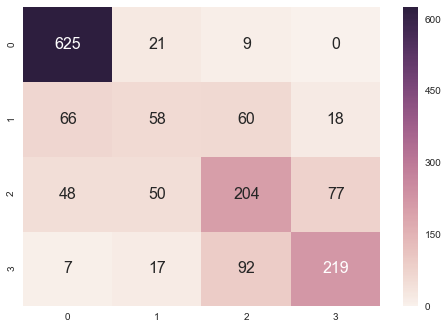

In [61]:
from sklearn.ensemble import RandomForestClassifier
train_eval(RandomForestClassifier, True)

accuracy:  0.68809675366

             precision    recall  f1-score   support

          1       0.76      0.97      0.85       655
          2       0.48      0.08      0.14       202
          3       0.59      0.41      0.48       379
          4       0.63      0.81      0.71       335

avg / total       0.65      0.69      0.64      1571

macro precision:  0.615089896065
micro precision:  0.68809675366

micro recall:  0.68809675366
macro recall:  0.56854124927

micro f1:  0.68809675366
macro f1:  0.544806060126


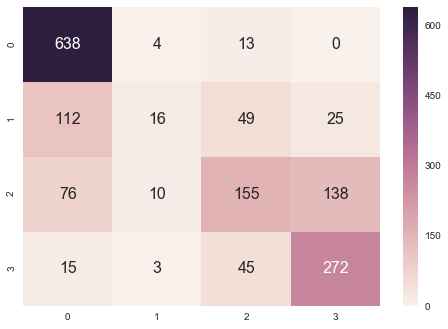

In [62]:
from sklearn.linear_model import RidgeClassifier
train_eval(RidgeClassifier, True)

accuracy:  0.68809675366

             precision    recall  f1-score   support

          1       0.76      0.97      0.85       655
          2       0.48      0.08      0.14       202
          3       0.59      0.41      0.48       379
          4       0.63      0.81      0.71       335

avg / total       0.65      0.69      0.64      1571

macro precision:  0.615089896065
micro precision:  0.68809675366

micro recall:  0.68809675366
macro recall:  0.56854124927

micro f1:  0.68809675366
macro f1:  0.544806060126


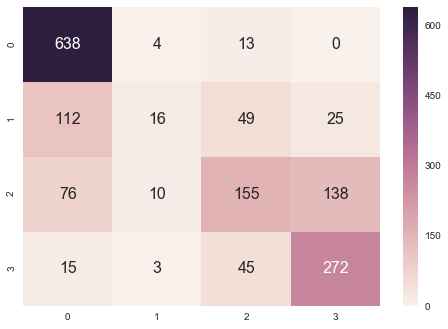

In [63]:
from sklearn.linear_model import RidgeClassifierCV
train_eval(RidgeClassifierCV)

### 1v1

accuracy:  0.642902609803

             precision    recall  f1-score   support

          1       0.82      0.91      0.86       655
          2       0.29      0.33      0.31       202
          3       0.49      0.40      0.44       379
          4       0.66      0.58      0.62       335

avg / total       0.64      0.64      0.64      1571

macro precision:  0.562808575854
micro precision:  0.642902609803

micro recall:  0.642902609803
macro recall:  0.555736721095

micro f1:  0.642902609803
macro f1:  0.556499934156


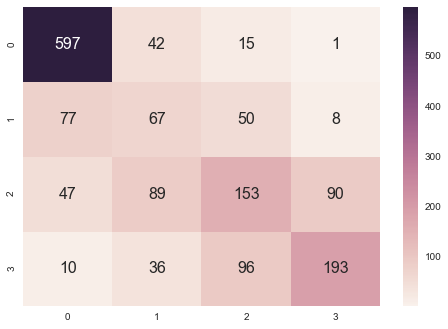

In [64]:
from sklearn.svm import NuSVC
train_eval(NuSVC, True, nu=0.1)

accuracy:  0.677912157861

             precision    recall  f1-score   support

          1       0.74      0.98      0.84       655
          2       0.25      0.00      0.01       202
          3       0.56      0.54      0.55       379
          4       0.67      0.65      0.66       335

avg / total       0.62      0.68      0.62      1571

macro precision:  0.552278526682
micro precision:  0.677912157861

micro recall:  0.677912157861
macro recall:  0.544447494367

micro f1:  0.677912157861
macro f1:  0.51470221123


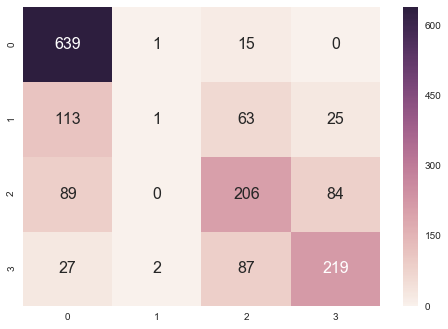

In [65]:
from sklearn.svm import SVC
train_eval(SVC, True)

accuracy:  0.577975811585

             precision    recall  f1-score   support

          1       0.58      0.97      0.72       655
          2       0.11      0.00      0.01       202
          3       0.49      0.29      0.36       379
          4       0.67      0.49      0.56       335

avg / total       0.52      0.58      0.51      1571

macro precision:  0.463495011744
micro precision:  0.577975811585

micro recall:  0.577975811585
macro recall:  0.437145563169

micro f1:  0.577975811585
macro f1:  0.415417781494


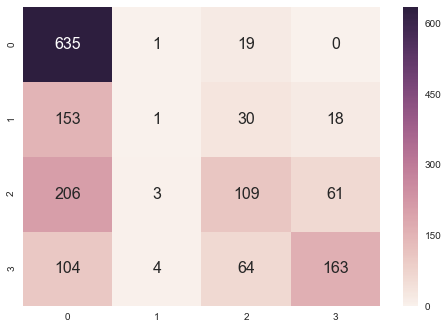

In [66]:
from sklearn.gaussian_process import GaussianProcessClassifier
train_eval(GaussianProcessClassifier, True, multi_class='one_vs_one')

### 1vAll

accuracy:  0.751113940165

             precision    recall  f1-score   support

          1       0.86      0.97      0.91       655
          2       0.52      0.39      0.44       202
          3       0.64      0.62      0.63       379
          4       0.75      0.70      0.72       335

avg / total       0.74      0.75      0.74      1571

macro precision:  0.690195353433
micro precision:  0.751113940165

micro recall:  0.751113940165
macro recall:  0.667864403234

micro f1:  0.751113940165
macro f1:  0.675493385611


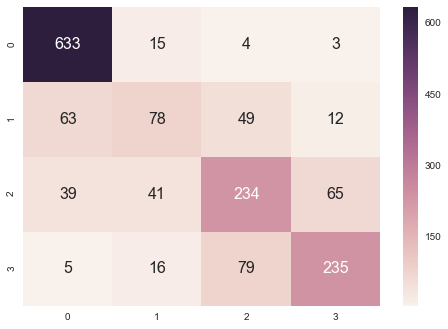

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
train_eval(GradientBoostingClassifier, True)

In [68]:
#from sklearn.gaussian_process import GaussianProcessClassifier
#train_eval(GaussianProcessClassifier, True)

accuracy:  0.717377466582

             precision    recall  f1-score   support

          1       0.81      0.97      0.88       655
          2       0.49      0.17      0.25       202
          3       0.62      0.50      0.55       379
          4       0.65      0.81      0.72       335

avg / total       0.69      0.72      0.69      1571

macro precision:  0.643079423186
micro precision:  0.717377466582

micro recall:  0.717377466582
macro recall:  0.610313300805

micro f1:  0.717377466582
macro f1:  0.601090710111


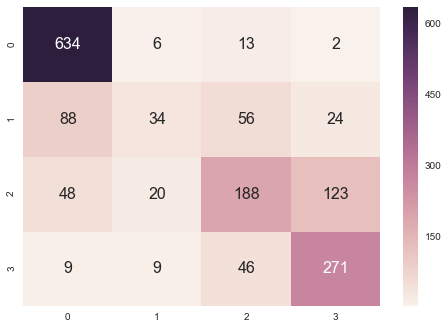

In [69]:
from sklearn.svm import LinearSVC
train_eval(LinearSVC, True, multi_class='ovr')

In [70]:
#from sklearn.linear_model import LogisticRegression
#train_eval(LogisticRegression, True, multi_class='ovr')

In [71]:
#from sklearn.linear_model import LogisticRegressionCV
#train_eval(LogisticRegressionCV, True, multi_class='ovr')

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.645448758752

             precision    recall  f1-score   support

          1       0.74      0.98      0.84       655
          2       0.52      0.08      0.14       202
          3       0.64      0.12      0.20       379
          4       0.52      0.91      0.66       335

avg / total       0.64      0.65      0.56      1571

macro precision:  0.602246460425
micro precision:  0.645448758752

micro recall:  0.645448758752
macro recall:  0.525924026938

micro f1:  0.645448758752
macro f1:  0.463220037062


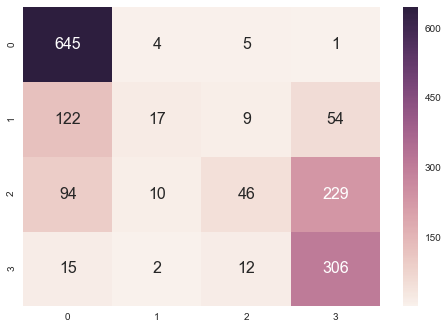

In [72]:
from sklearn.linear_model import SGDClassifier
train_eval(SGDClassifier, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.630808402292

             precision    recall  f1-score   support

          1       0.68      0.98      0.80       655
          2       0.31      0.23      0.26       202
          3       0.72      0.11      0.19       379
          4       0.62      0.77      0.69       335

avg / total       0.63      0.63      0.56      1571

macro precision:  0.582766707948
micro precision:  0.630808402292

micro recall:  0.630808402292
macro recall:  0.523442336147

micro f1:  0.630808402292
macro f1:  0.486146660257


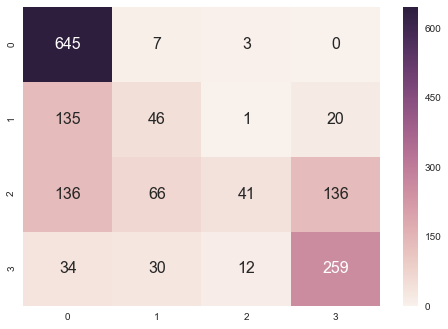

In [73]:
from sklearn.linear_model import Perceptron
train_eval(Perceptron, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.616168045831

             precision    recall  f1-score   support

          1       0.68      1.00      0.81       655
          2       0.20      0.00      0.01       202
          3       0.75      0.01      0.02       379
          4       0.52      0.92      0.67       335

avg / total       0.60      0.62      0.48      1571

macro precision:  0.536804297855
micro precision:  0.616168045831

micro recall:  0.616168045831
macro recall:  0.483813530508

micro f1:  0.616168045831
macro f1:  0.374537036228


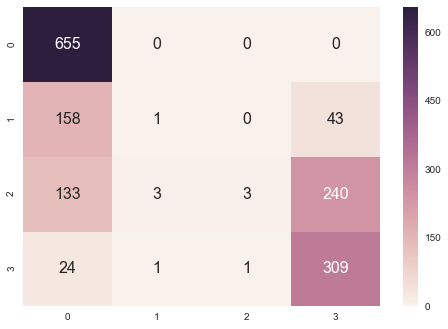

In [74]:
from sklearn.linear_model import PassiveAggressiveClassifier
train_eval(PassiveAggressiveClassifier, True)

### Results

In [75]:
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']] \
.sort_values(by=['Algoritmus', 'Transformácia'])

,Algoritmus,Transformácia,S,P_0,P_1,P_2,P_3,Ú_0,Ú_1,Ú_2,Ú_3,F1_makro
0,BernoulliNB,nie,0.54,0.83,0.25,0.41,0.52,0.65,0.31,0.49,0.54,0.50
23,BernoulliNB,áno,0.55,0.83,0.24,0.41,0.53,0.65,0.30,0.51,0.54,0.50
1,DecisionTreeClassifier,nie,0.64,0.85,0.28,0.48,0.65,0.86,0.33,0.45,0.63,0.56
24,DecisionTreeClassifier,áno,0.64,0.86,0.28,0.50,0.63,0.84,0.33,0.46,0.63,0.57
2,ExtraTreeClassifier,nie,0.54,0.74,0.22,0.40,0.48,0.77,0.23,0.37,0.47,0.46
25,ExtraTreeClassifier,áno,0.61,0.81,0.30,0.45,0.54,0.84,0.31,0.43,0.53,0.53
3,ExtraTreesClassifier,nie,0.65,0.76,0.28,0.53,0.67,0.94,0.18,0.50,0.56,0.54
26,ExtraTreesClassifier,áno,0.68,0.82,0.35,0.53,0.65,0.96,0.22,0.52,0.61,0.58
4,GaussianNB,nie,0.33,0.99,0.14,0.29,0.85,0.12,0.15,0.90,0.21,0.28
27,GaussianNB,áno,0.26,0.86,0.15,0.46,0.68,0.11,0.92,0.05,0.39,0.26


### Results sorted by Accuracy

In [76]:
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']] \
.sort_values(by=['S'], ascending=False)

,Algoritmus,Transformácia,S,P_0,P_1,P_2,P_3,Ú_0,Ú_1,Ú_2,Ú_3,F1_makro
41,GradientBoostingClassifier,áno,0.75,0.86,0.52,0.64,0.75,0.97,0.39,0.62,0.70,0.68
7,LogisticRegression,nie,0.75,0.84,0.50,0.62,0.79,0.97,0.31,0.65,0.69,0.66
18,GradientBoostingClassifier,nie,0.74,0.85,0.49,0.63,0.75,0.97,0.38,0.60,0.69,0.67
31,LogisticRegressionCV,áno,0.74,0.86,0.48,0.61,0.72,0.94,0.35,0.58,0.75,0.66
30,LogisticRegression,áno,0.73,0.84,0.50,0.61,0.71,0.95,0.30,0.57,0.76,0.65
32,MLPClassifier,áno,0.73,0.87,0.48,0.59,0.69,0.92,0.34,0.57,0.76,0.65
29,LinearDiscriminantAnalysis,áno,0.72,0.86,0.40,0.67,0.71,0.91,0.46,0.50,0.76,0.65
42,LinearSVC,áno,0.72,0.81,0.49,0.62,0.65,0.97,0.17,0.50,0.81,0.60
35,RandomForestClassifier,áno,0.70,0.84,0.40,0.56,0.70,0.95,0.29,0.54,0.65,0.61
36,RidgeClassifier,áno,0.69,0.76,0.48,0.59,0.63,0.97,0.08,0.41,0.81,0.54


In [77]:
# store results
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']]\
.sort_values(by=['Algoritmus', 'Transformácia']).to_csv('results/meta_dynamic.csv')

In [81]:
df_results.describe()

,F1_makro,P_0,P_1,P_2,P_3,S,Ú_0,Ú_1,Ú_2,Ú_3
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,0.473913,0.773913,0.288696,0.466522,0.623261,0.583043,0.800000,0.237609,0.403696,0.570435
std,0.149629,0.133475,0.165672,0.167322,0.172705,0.146073,0.286287,0.234977,0.235196,0.237027
min,0.140000,0.420000,0.000000,0.000000,0.000000,0.170000,0.030000,0.000000,0.000000,0.000000
25%,0.397500,0.740000,0.150000,0.385000,0.545000,0.525000,0.832500,0.042500,0.282500,0.475000
50%,0.500000,0.825000,0.280000,0.490000,0.670000,0.630000,0.935000,0.225000,0.455000,0.620000
75%,0.577500,0.860000,0.467500,0.590000,0.707500,0.690000,0.970000,0.330000,0.555000,0.737500
max,0.680000,0.990000,0.520000,0.750000,0.890000,0.750000,1.000000,0.940000,0.900000,0.950000
